In [1]:
import pandas as pd
from dateutil import parser
import datasets


# function to parse dates in registration dataset
def safe_parse_date(date_entry):
    if pd.isna(date_entry):
        return pd.NaT
    elif isinstance(date_entry, str):
        try:
            return parser.parse(date_entry)
        except:
            try:
                # if two dates
                date_entry = date_entry.split(',')[-1]
                return parser.parse(date_entry)
            except:
                return pd.NaT
    else:
        date_entry = str(date_entry)
        # Handle the non-string date entry here
        # Example: return None or use a default date
        return parser.parse(date_entry)

df = pd.read_csv("combined.csv", low_memory=False)
# regNum are of the form 'A 123456' but no spaces in renewals
df['regNum'] = df['regnum'].str.replace(' ', '')
df['regDate'] = pd.to_datetime(df['regDate'], format="mixed", errors="coerce")
count_all = len(df)
print(f"Total rows: {count_all:,}")
# remove all registered after 1963
df = df[df['regDate'].dt.year < 1963]
count_filtered = len(df)
print(f"Count after filtering < 1963: {count_filtered:,}") # remove all without regDate
df = df.dropna(subset=['regDate', 'regnum'])
print(f"After removal of N/A regdate or num: {len(df):,}")
# Get renewals dataset
r_df = pd.DataFrame(datasets.load_dataset("baber/cce-renewals")["train"])
r_df['odat'] = pd.to_datetime(r_df['odat'], format='ISO8601')

# match all rows with registration date AND registration number
mask = df.set_index(['regDate', "regnum"]).index.isin(r_df.set_index(['odat', "oreg"]).index)
df1_filtered = df[~mask]
print(f"After filtering for matches: {len(df1_filtered):,}")

Total rows: 2,169,792
Count after filtering < 1963: 834,182
After removal of N/A regdate or num: 672,125
After filtering for matches: 537,126


In [7]:
df.head(10)

,author,title,edition,regDate,regNum,publisher,id,regnum,series,vol,...,<cyfunction Comment at 0x1075e6f60>,pubDate,regdate,page,emandationDesc,role,registrations,newMatter,emeded,Year
0,{'authorName': 'Abrams (Talbert)'},Essentials of aerial surveying and photo inter...,1st ed.,1944-07-17,A181780,"{'pubName': 'McGraw-Hill book co., inc.', 'pub...",FC10B2ED-7454-1014-804D-AD6D08A5DF13,A181780,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
1,{'authorName': 'Akers (Susan Grey)'},Simple library cataloging,NaN,1944-06-29,A181778,"{'pubName': 'Amer. library assn.', 'pubPlace':...",FC10C2AA-7454-1014-804D-AD6D08A5DF13,A181778,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
2,{'authorName': 'Almack (John C.)'},Painted pony,NaN,1944-07-01,A181622,"{'pubName': 'Wallace Hebberd', 'pubPlace': 'Sa...",FC10C53D-7454-1014-804D-AD6D08A5DF13,A181622,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
3,{'authorName': 'Altenburg (Clarence E.)'},Modern conquistador in South America,NaN,1944-06-24,A181549,"{'pubName': 'Christopher pub. house', 'pubPlac...",FC10C77B-7454-1014-804D-AD6D08A5DF13,A181549,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
4,{'authorName': 'Altrocchi (Rudolph)'},Sleuthing in the stacks,NaN,1944-06-23,A181542,{'pubName': 'President & fellows of Harvard co...,FC10C9F9-7454-1014-804D-AD6D08A5DF13,A181542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
5,NaN,American bankruptcy reports,NaN,1944-07-14,A181773,"{'pubName': 'Matthew Bender & co., inc.', 'pub...",FC10CC3E-7454-1014-804D-AD6D08A5DF13,A181773,New series,v. 55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
6,NaN,American educator encyclopedia,NaN,1944-07-07,A181644,"{'pubName': 'United educator, inc.', 'pubPlace...",FC10CE61-7454-1014-804D-AD6D08A5DF13,A181644,NaN,v. 1-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
7,NaN,American jurisprudence,NaN,1944-07-10,A181768,"{'pubName': 'Jurisprudence publishers, inc.', ...",FC10D062-7454-1014-804D-AD6D08A5DF13,A181768,NaN,v. 51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
8,{'authorName': 'American medical association. ...,New and nonofficial remedies,NaN,1944-06-08,A181223,"{'pubName': 'Amer. medical assn.', 'pubPlace':...",FC10D263-7454-1014-804D-AD6D08A5DF13,A181223,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944
9,"{'authorName': 'Anderson (Walter H.)', 'author...",Dru deal,NaN,1944-06-15,A181568,NaN,FC10D485-7454-1014-804D-AD6D08A5DF13,A181568,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944


/var/folders/jk/7srv9d5d0wvcbz8z_t3yjz_m0000gn/T/ipykernel_34898/1699820953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_renewals['Year'] = matched_renewals['regDate'].dt.year


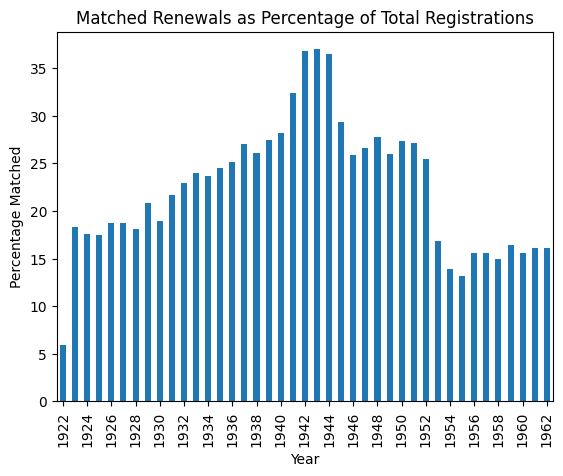

In [3]:
import matplotlib.pyplot as plt
matched_renewals = df[mask]

# Add a 'Year' column to both the original and matched renewals DataFrame
df['Year'] = df['regDate'].dt.year
matched_renewals['Year'] = matched_renewals['regDate'].dt.year

# Calculate the total counts and matched renewal counts per year
total_counts_per_year = df.groupby('Year').size()
total_counts_per_year = total_counts_per_year[total_counts_per_year.index >= 1922]

matched_counts_per_year = matched_renewals.groupby('Year').size()
matched_counts_per_year = matched_counts_per_year[matched_counts_per_year.index >= 1922]

# Calculate the percentage of matched renewals
renewal_percentage = (matched_counts_per_year / total_counts_per_year) * 100

# Plot
fig, ax = plt.subplots()
renewal_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Percentage Matched')
ax.set_xlabel('Year')
ax.set_title('Matched Renewals as Percentage of Total Registrations')
ax.set_xticks(ax.get_xticks()[::2])
plt.show()

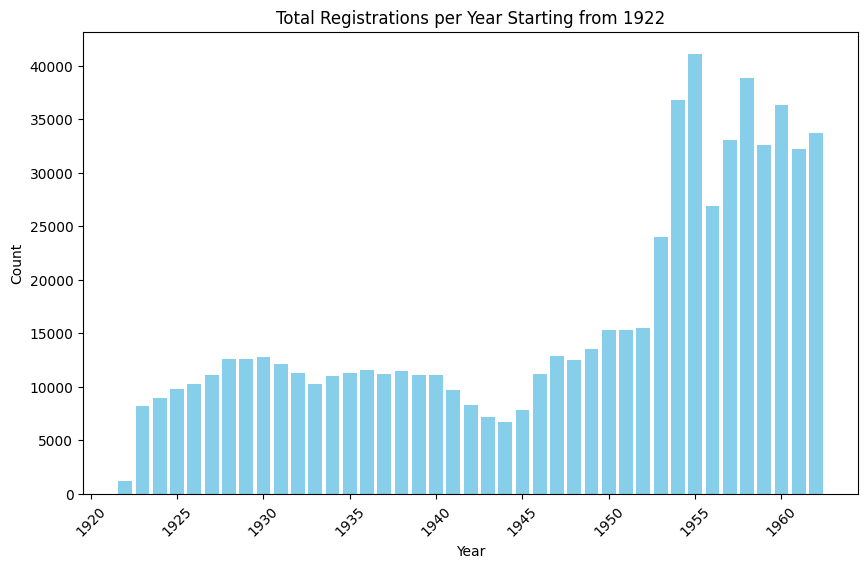

In [4]:
total_counts_per_year = df.groupby('Year').size()
filtered_data = total_counts_per_year[total_counts_per_year.index >= 1922]
plt.figure(figsize=(10, 6))
plt.bar(filtered_data.index, filtered_data.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Registrations per Year Starting from 1922')
plt.xticks(rotation=45)
plt.show()


In [5]:
#foreign rows
count_foreign = df1_filtered['regnum'].str.startswith('AF').sum()
remaining = len(df1_filtered)-count_foreign
print(f"Total Titles Left: {len(df1_filtered):,}")
print(f"Foreign Titles: {count_foreign:,}")
print(f"Total matched: {mask.sum():,}")
print(f"Remaining: {remaining:,}")


Total Titles Left: 537,126
Foreign Titles: 93,793
Total matched: 134,999
Remaining: 443,333


/var/folders/jk/7srv9d5d0wvcbz8z_t3yjz_m0000gn/T/ipykernel_34898/677868009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Year'] = df1_filtered['regDate'].dt.year


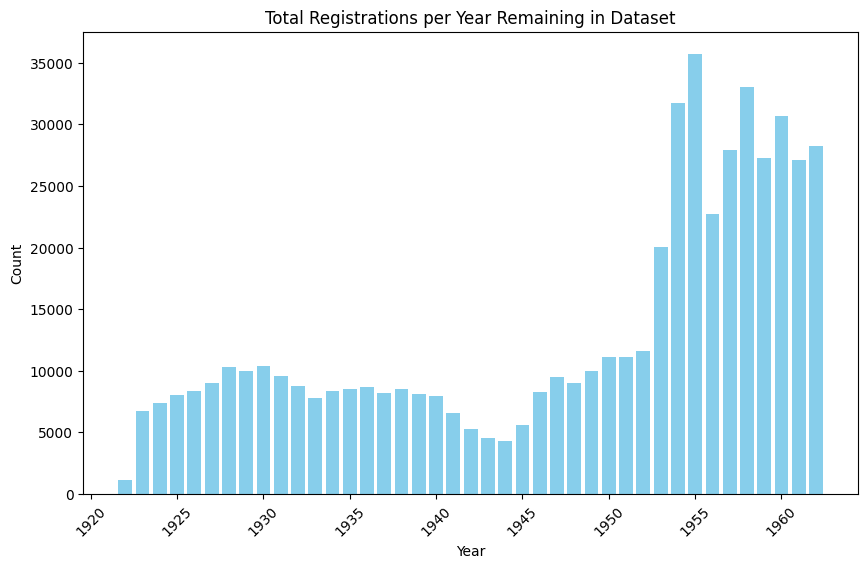

In [6]:
remaining_df = df1_filtered[df1_filtered['regnum'].str.startswith('AF')]
df1_filtered['Year'] = df1_filtered['regDate'].dt.year
total_counts_per_year = df1_filtered.groupby('Year').size()
filtered_data = total_counts_per_year[total_counts_per_year.index >= 1922]
plt.figure(figsize=(10, 6))
plt.bar(filtered_data.index, filtered_data.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Registrations per Year Remaining in Dataset')
plt.xticks(rotation=45)
plt.show()